<a href="https://colab.research.google.com/github/oalawode/Git_Class1/blob/main/Stage_B_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv'
df=pd.read_csv(url)
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [6]:
#rename column names

column_names = {
    'T1' : 'Temperature_Kitchen_Area', 'RH_1' : 'Humidity_Kitchen_Area',
    'T2' : 'Temperature_Living_Room', 'RH_2' : 'Humidity_Living_Room',
    'T3' : 'Temperature_Laundry_Room', 'RH_3' : 'Humidity_Laundry_Room',
    'T4' : 'Temperature_Office_Room', 'RH_4' : 'Humidity_Office_Room',
    'T5' : 'Temperature_Bathroom_Room', 'RH_5' : 'Humidity_Bathroom_Room',
    'T6' : 'Temperature_Outside_Building', 'RH_6' : 'Humidity_Outside_Building',
    'T7' : 'Temperature_Ironing_Room', 'RH_7' : 'Humidity_Ironing_Room',
    'T8' : 'Temperature_Teenager_Room', 'RH_8' : 'Humidity_Teenager_Room',
    'T9' : 'Temperature_Parents_Room', 'RH_9' : 'Humidity_Parents_Room',
    'T_out' : 'Temperatire_Outside', 'RH_out' : 'Humidity_Outside'
    }

df = df.rename(columns=column_names)
df

,date,Appliances,lights,Temperature_Kitchen_Area,Humidity_Kitchen_Area,Temperature_Living_Room,Humidity_Living_Room,Temperature_Laundry_Room,Humidity_Laundry_Room,Temperature_Office_Room,Humidity_Office_Room,Temperature_Bathroom_Room,Humidity_Bathroom_Room,Temperature_Outside_Building,Humidity_Outside_Building,Temperature_Ironing_Room,Humidity_Ironing_Room,Temperature_Teenager_Room,Humidity_Teenager_Room,Temperature_Parents_Room,Humidity_Parents_Room,Temperatire_Outside,Press_mm_hg,Humidity_Outside,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [12]:
#select a sample of the dataset

simple_linear_reg_df = df[['Temperature_Living_Room','Temperature_Outside_Building', ]].sample(15, random_state=2)

simple_linear_reg_df

,Temperature_Living_Room,Temperature_Outside_Building
1117,17.426667,-4.238889
16275,22.760000,14.690000
13272,21.230000,8.926667
3160,21.100000,7.690000
19210,21.856667,10.800000
8260,17.356667,5.000000
12299,19.000000,5.300000
13505,22.700000,17.133333
12913,19.593333,7.545000
17788,21.890000,9.190000


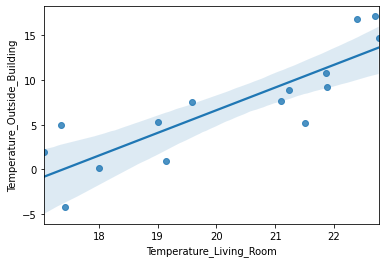

In [13]:
#regression plot
sns.regplot(x='Temperature_Living_Room', y='Temperature_Outside_Building', data=simple_linear_reg_df)

In [42]:
#Firstly, we normalise our dataset to a common scale using the min max scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_df = df.drop(columns=['date', 'lights'])
normalised_df = pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns)
features_df = normalised_df.drop(columns=['rv1', 'rv2'])
target_variable = normalised_df['Appliances']


#Now, we split our dataset into the trainig and testing datasets. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target_variable, test_size=0.7, random_state=42)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

#fit the model to the training dataset
linear_model.fit(x_train, y_train)

#obtain predictions
predicted_values = linear_model.predict(x_test)




In [43]:
#R-Squared

from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2) 


1.0

In [44]:
#Mean Absolute Error

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2)

0.0

In [45]:
#Residual Sum of Squares

rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)

0.0

In [46]:
# Root Mean Square Error

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 2) 

0.0

In [47]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df


In [48]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [55]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights['Linear_Model_Weight']

0    -3.980570e-16
1    -3.534729e-16
2    -2.916119e-16
3    -2.679853e-16
4    -1.996585e-16
5    -1.558583e-16
6    -1.458497e-16
7    -1.266942e-16
8    -1.161929e-16
9    -1.141532e-16
10   -1.036377e-16
11   -9.389327e-17
12   -8.088670e-17
13    2.329442e-17
14    2.804066e-17
15    5.834095e-17
16    9.546554e-17
17    1.289678e-16
18    2.145026e-16
19    2.936802e-16
20    4.498843e-16
21    5.512582e-16
22    5.654816e-16
23    6.243072e-16
24    1.000000e+00
Name: Linear_Model_Weight, dtype: float64